In [1]:
import numpy as np
import pandas as pd
import utils
import seaborn as sn
import matplotlib.pyplot as plt

# Load data

In [2]:
data_big = pd.read_csv('data/big_results.csv', index_col=0)
data_big

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,_OPN8,_OPN9,_OPN10,EXT,EST,AGR,CSN,OPN,TYPE,CORR
0,3.0,5.0,3.0,2.0,3.0,5.0,3.0,5.0,1.0,5.0,...,3.0,3.0,1.0,21.0,24.0,32.0,32.0,30.0,0,1.000000
1,5.0,2.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,1.0,...,4.0,4.0,5.0,40.0,33.0,20.0,45.0,46.0,1,1.000000
2,4.0,2.0,5.0,4.0,4.0,2.0,2.0,4.0,5.0,5.0,...,2.0,5.0,4.0,33.0,41.0,38.0,39.0,40.0,238,0.970845
3,1.0,3.0,2.0,4.0,3.0,1.0,2.0,5.0,1.0,5.0,...,5.0,5.0,5.0,21.0,13.0,35.0,24.0,50.0,2,1.000000
4,4.0,2.0,4.0,3.0,4.0,2.0,4.0,1.0,5.0,3.0,...,4.0,4.0,5.0,40.0,33.0,43.0,29.0,46.0,3,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2.0,2.0,5.0,3.0,4.0,3.0,3.0,5.0,1.0,5.0,...,5.0,4.0,5.0,27.0,40.0,41.0,37.0,45.0,0,0.969519
499996,3.0,3.0,1.0,5.0,5.0,2.0,1.0,5.0,1.0,5.0,...,1.0,3.0,1.0,21.0,24.0,35.0,26.0,23.0,149,0.953793
499997,4.0,3.0,5.0,2.0,5.0,2.0,5.0,3.0,4.0,2.0,...,4.0,5.0,4.0,41.0,38.0,48.0,38.0,43.0,3,0.988586
499998,2.0,1.0,3.0,3.0,5.0,3.0,2.0,3.0,4.0,5.0,...,3.0,5.0,5.0,31.0,19.0,32.0,36.0,41.0,9,0.970936


# Filter data by best classes

In [3]:
best_class=data_big['TYPE'].value_counts()[:16].index.values.tolist()
best_class

[3, 0, 238, 9, 4, 11, 222, 29, 50, 5, 7, 20, 2, 1, 37, 66]

In [4]:
data_big_cleaned = data_big[data_big['TYPE'].isin(best_class)]
data_big_cleaned=data_big_cleaned.drop_duplicates()
data_big_cleaned=data_big_cleaned.reset_index(drop=True)
data_big_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424233 entries, 0 to 424232
Columns: 107 entries, EXT1 to CORR
dtypes: float64(106), int64(1)
memory usage: 346.3 MB


In [5]:
data_big_cleaned['TYPE'].value_counts()

3      146335
0       63638
238     35913
9       29683
4       25279
11      21344
222     14039
29      13388
50      12188
5       11875
7       11001
20       9464
2        9308
1        8500
37       6850
66       5428
Name: TYPE, dtype: int64

# Analise classes

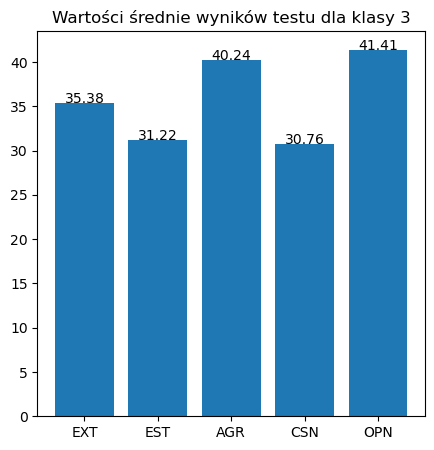

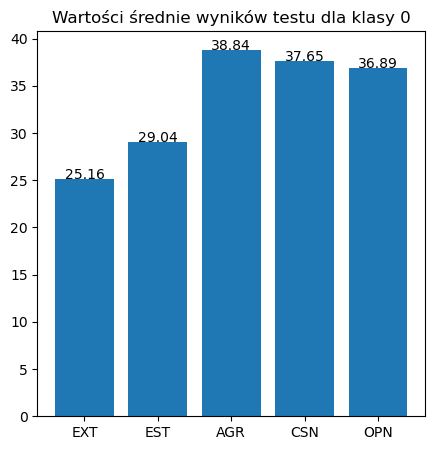

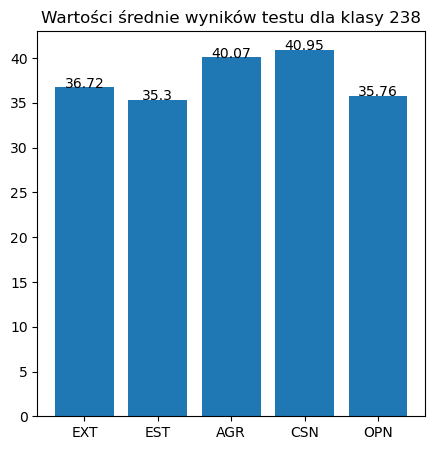

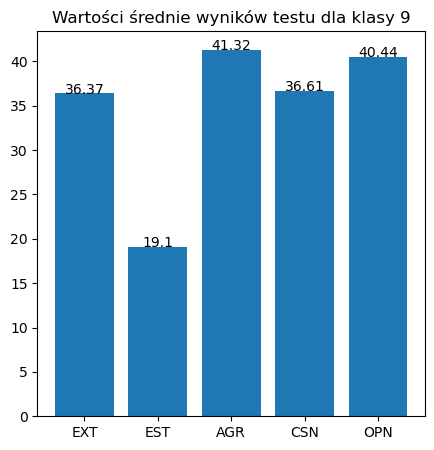

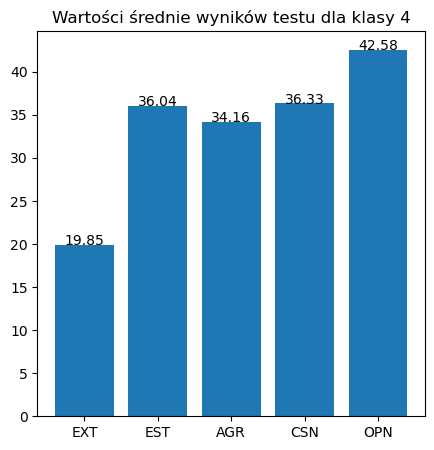

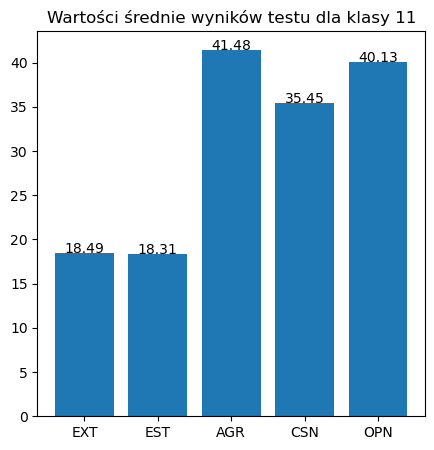

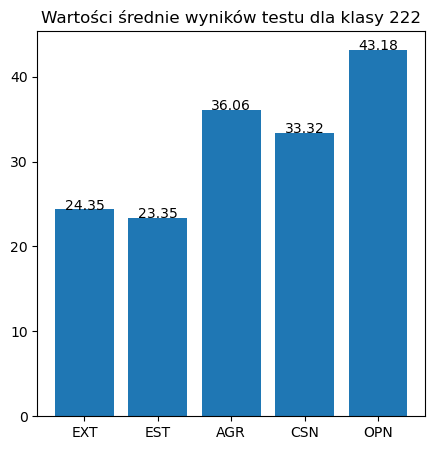

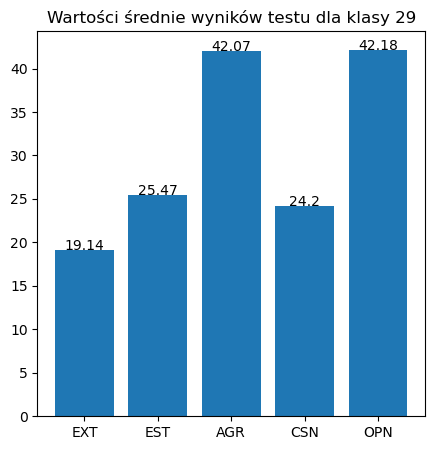

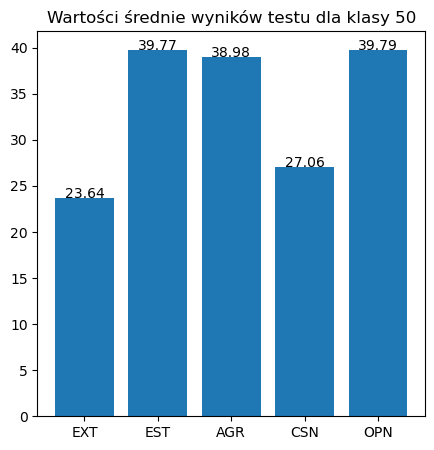

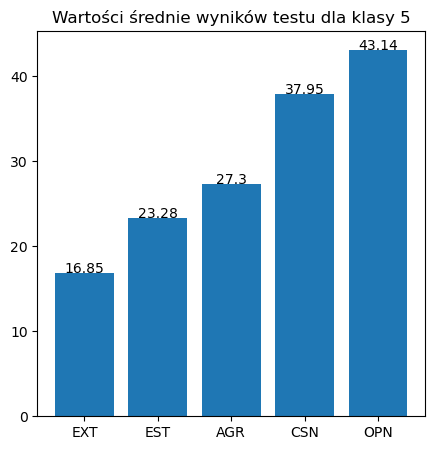

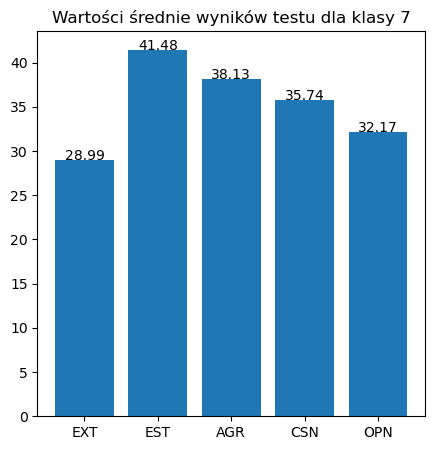

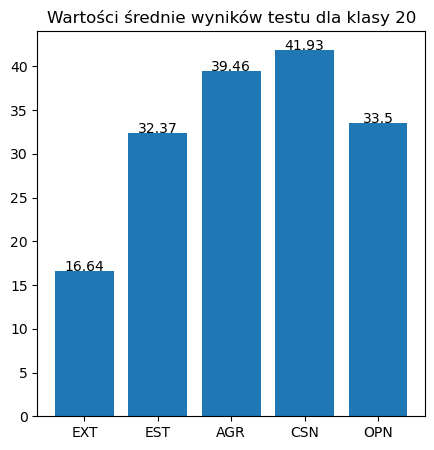

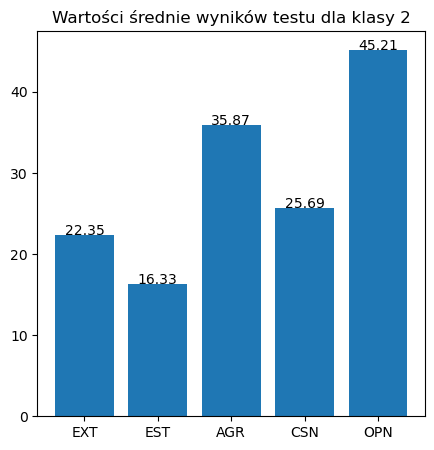

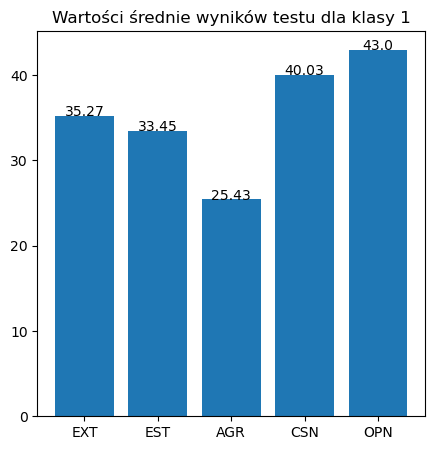

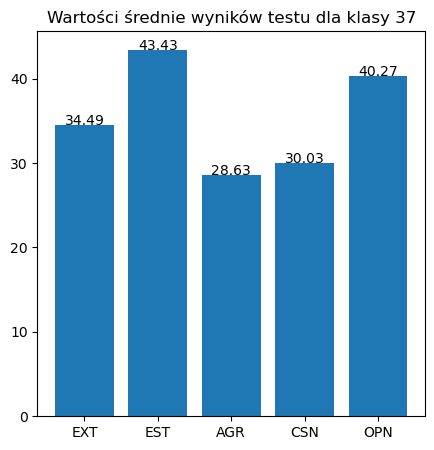

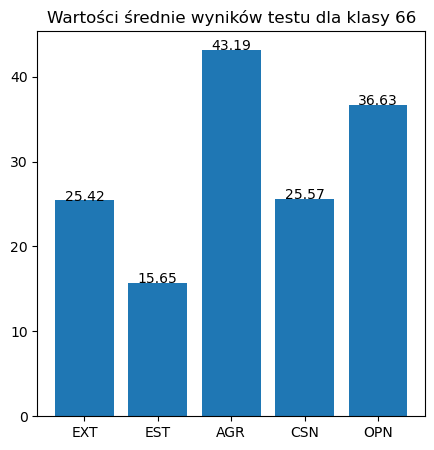

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 2), ha = 'center')

for i in data_big_cleaned['TYPE'].value_counts().keys().to_list():
    f, ax = plt.subplots(figsize=(5,5))
    x = np.array(["EXT", "EST", 'AGR', "CSN", "OPN"])
    y = np.array([data_big_cleaned[data_big_cleaned['TYPE']==i]['EXT'].mean(), \
                  data_big_cleaned[data_big_cleaned['TYPE']==i]['EST'].mean(), \
                  data_big_cleaned[data_big_cleaned['TYPE']==i]['AGR'].mean(), \
                  data_big_cleaned[data_big_cleaned['TYPE']==i]['CSN'].mean(), \
                  data_big_cleaned[data_big_cleaned['TYPE']==i]['OPN'].mean()])
#     print(x)
#     print(y)
    plt.title('Wartości średnie wyników testu dla klasy '+str(i))
    plt.bar(x,y)
    addlabels(x,y)
    plt.show()

# Save new data

In [9]:
data_big_cleaned.to_csv('data/big_cleaned_results.csv')  